In [1]:
using Revise

In [2]:
using SINDyABMs
using ModifiedSINDy
using GLMakie
using InteractiveDynamics
using LinearAlgebra, Optim, FFTW
using StatsBase

In [3]:
function plot_population_timeseries(data::AbstractMatrix; title = "Data")
    # set up figure
    figure = Figure(resolution = (600, 400))
    ax = figure[1, 1] = Axis(figure; xlabel = "Step", ylabel = "Population", title = title)
    # plot individual populations from data
    herbivorel = lines!(ax, data[:, 2], color = :cornsilk4)
    grassl = lines!(ax, data[:, 1], color = :green)
    # add legend
    figure[1, 2] = Legend(figure, [grassl, herbivorel], ["Grass", "Herbivore"])
    display(figure)
end

function plot_smoothed_data(data::AbstractMatrix, derivs::AbstractMatrix)
    # set up figure
    figure = Figure(resolution = (1000, 400))

    # plotting pop data
    ax = figure[1, 1] = Axis(figure; xlabel = "Step", ylabel = "Population", title = "Smoothed Populations")
    # plot individual populations from pop data
    herbivorel = lines!(ax, data[:, 2], color = :cornsilk4)
    grassl = lines!(ax, data[:, 1], color = :green)

    # plotting deriv data
    ax = figure[1, 2] = Axis(figure; xlabel = "Step", ylabel = "Derivative", title = "Smoothed Derivatives")
    # plot individual populations from deriv data
    herbivorel = lines!(ax, derivs[:, 2], color = :cornsilk4)
    grassl = lines!(ax, derivs[:, 1], color = :green)

    # add legend
    figure[1, 3] = Legend(figure, [grassl, herbivorel], ["Grass", "Herbivore"])
    display(figure)

    # Now make the phase space Plots
    figure = Figure(resolution = (1000, 400))
    ax = figure[1, 1] = Axis(figure; xlabel = "Data", ylabel = "Derivative", title = "Grass Phase Space")
    grass_pl = lines!(ax, data[:, 1], derivs[:, 1], color = :green)
    ax = figure[1, 2] = Axis(figure; xlabel = "Data", ylabel = "Derivative", title = "Herbivore Phase Space")
    herbivore_pl = lines!(ax, data[:, 2], derivs[:, 2], color = :cornsilk4)

    # add legend
    figure[1, 3] = Legend(figure, [grass_pl, herbivore_pl], ["Grass", "Herbivore"])

    display(figure)
end

function normalize_data(data::AbstractMatrix)
    # normalize data to be between 0 and 1
    data_norm = zeros(size(data))
    for i in 1:size(data, 2)
        data_norm[:, i] = data[:, i]./maximum(data[:, i])
    end
    return data_norm
end

normalize_data (generic function with 1 method)

In [4]:
function plot_population(data::AbstractMatrix; title = "Data")
    # set up figure
    figure = Figure(resolution = (600, 400))
    ax = figure[1, 1] = Axis(figure; xlabel = "Step", ylabel = "Population", title = title)
    # plot individual populations from data
    herbivorel = lines!(ax, data[:, 2], color = :cornsilk4)
    carnivorel = lines!(ax, data[:, 3], color = RGBAf(0.2, 0.2, 0.3))
    grassl = lines!(ax, data[:, 1], color = :green)
    # add legend
    figure[1, 2] = Legend(figure, [grassl, herbivorel, carnivorel], ["Grass", "Herbivore", "Carnivore"])
    display(figure)
end

function plot_smoothed_data_system(data::AbstractMatrix, derivs::AbstractMatrix; second = true)
    # set up figure
    figure = Figure(resolution = (1000, 400))

    # plotting pop data
    ax = figure[1, 1] = Axis(figure; xlabel = "Step", ylabel = "Population", title = "Smoothed Populations")
    # plot individual populations from pop data
    herbivorel = lines!(ax, data[:, 2], color = :cornsilk4)
    carnivorel = lines!(ax, data[:, 3], color = RGBAf(0.2, 0.2, 0.3))
    grassl = lines!(ax, data[:, 1], color = :green)

    # plotting deriv data
    ax = figure[1, 2] = Axis(figure; xlabel = "Step", ylabel = "Derivative", title = "Smoothed Derivatives")
    # plot individual populations from deriv data
    herbivorel = lines!(ax, derivs[:, 2], color = :cornsilk4)
    carnivorel = lines!(ax, derivs[:, 3], color = RGBAf(0.2, 0.2, 0.3))
    grassl = lines!(ax, derivs[:, 1], color = :green)

    # add legend
    figure[1, 3] = Legend(figure, [grassl, herbivorel, carnivorel], ["Grass", "Herbivore", "Carnivore"])
    display(figure)

    if second
        # Now make the phase space Plots
        figure = Figure(resolution = (1000, 400))
        ax = figure[1, 1] = Axis(figure; xlabel = "Data", ylabel = "Derivative", title = "Grass Phase Space")
        grass_pl = lines!(ax, data[:, 1], derivs[:, 1], color = :green)
        ax = figure[1, 2] = Axis(figure; xlabel = "Data", ylabel = "Derivative", title = "Herbivore Phase Space")
        herbivore_pl = lines!(ax, data[:, 2], derivs[:, 2], color = :cornsilk4)
        ax = figure[1, 3] = Axis(figure; xlabel = "Data", ylabel = "Derivative", title = "Carnivore Phase Space")
        carnivore_pl = lines!(ax, data[:, 3], derivs[:, 3], color = RGBAf(0.2, 0.2, 0.3))

        # add legend
        figure[1, 4] = Legend(figure, [grass_pl, herbivore_pl], ["Grass", "Herbivore"])

        display(figure)
    end
end

plot_smoothed_data_system (generic function with 1 method)

In [8]:
PredatorPrey.make_video_grass_sheep_system(100, 100)

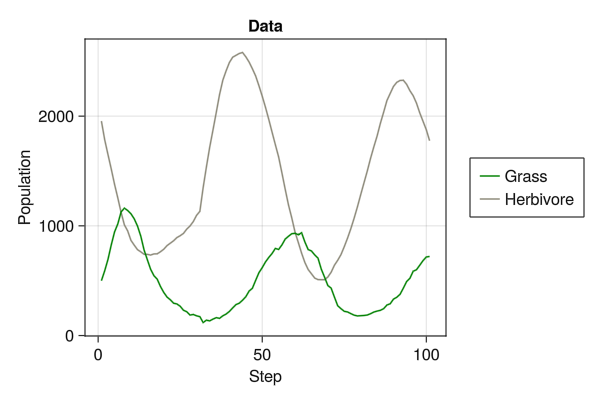

GLMakie.Screen(...)

In [7]:
dataset = PredatorPrey.simulate_grass_sheep_system(500, 100)
dt = 1
plot_population_timeseries(dataset)

In [94]:
# remove every other data point in dataset
dataset = dataset[1:2:end, :];
dt = 2;

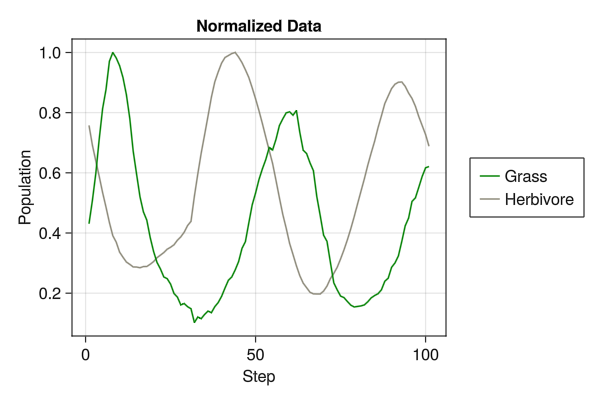

GLMakie.Screen(...)

In [8]:
dataset_norm = float.(dataset[:, 1])./maximum(dataset[:, 1])
dataset_norm = hcat(dataset_norm, float.(dataset[:, 2])./maximum(dataset[:, 2]))
plot_population_timeseries(dataset_norm, title = "Normalized Data")

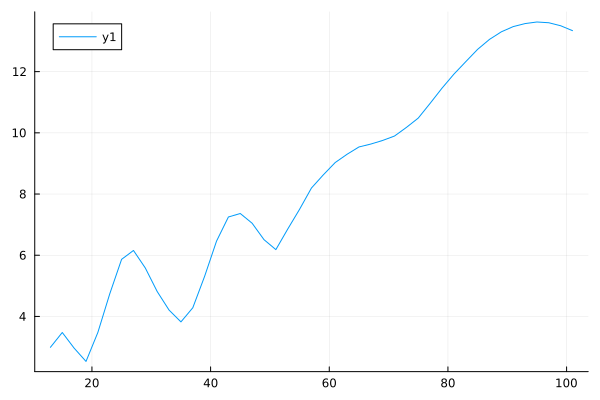

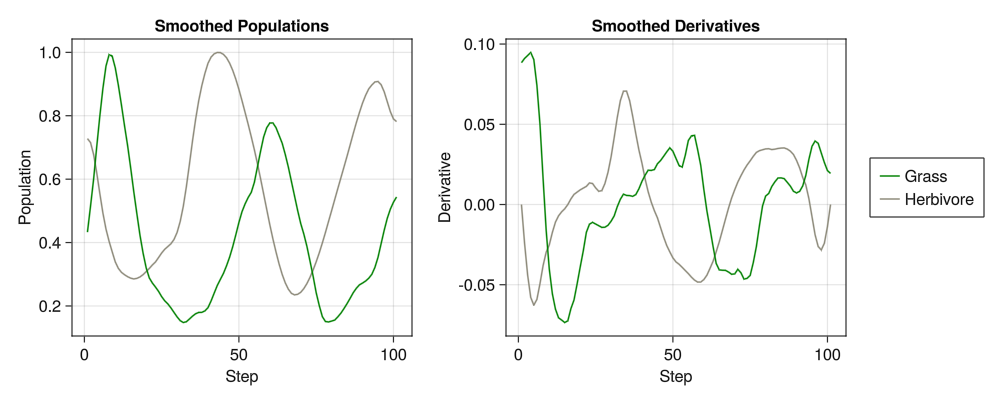

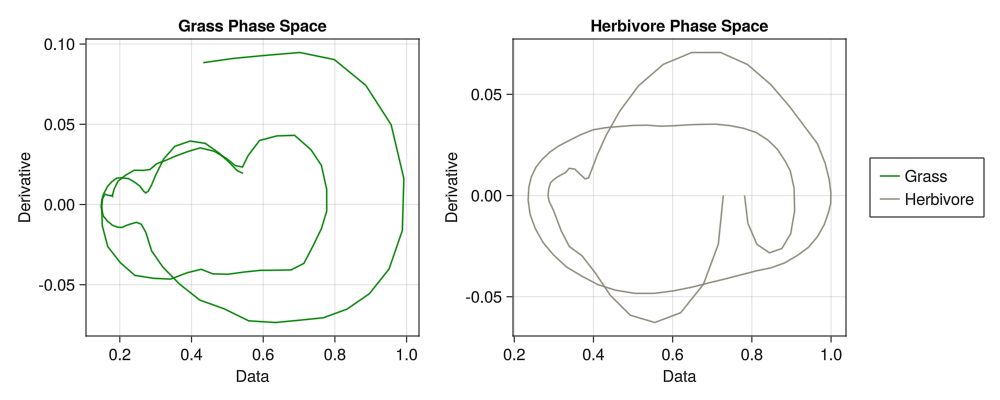

GLMakie.Screen(...)

In [144]:
ues, dues = SG_smoothing_optim(dataset_norm, dt; loss_function = 2, disp_loss_landscape = true)
plot_smoothed_data(ues, dues)

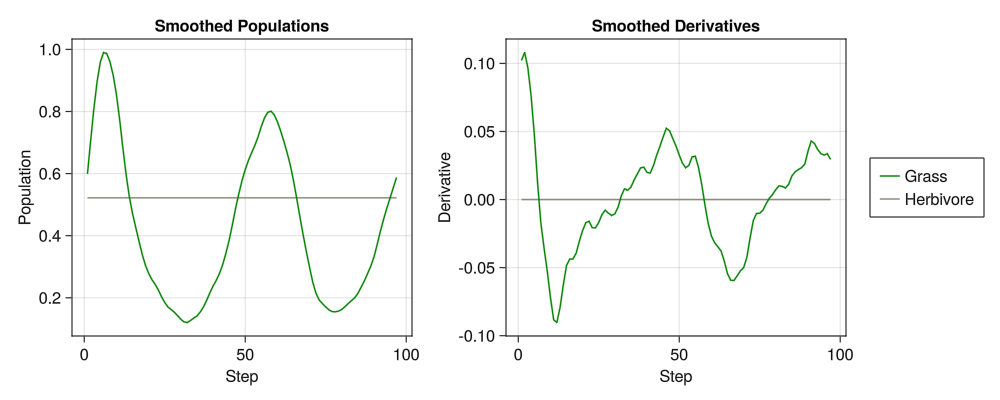

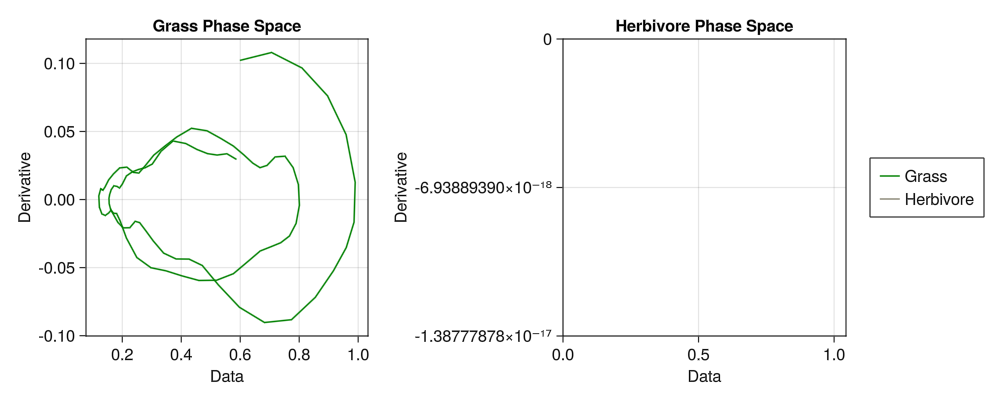

GLMakie.Screen(...)

In [9]:
ues, dues = DCT_smooth(dataset_norm, dt)
plot_smoothed_data(ues, dues)

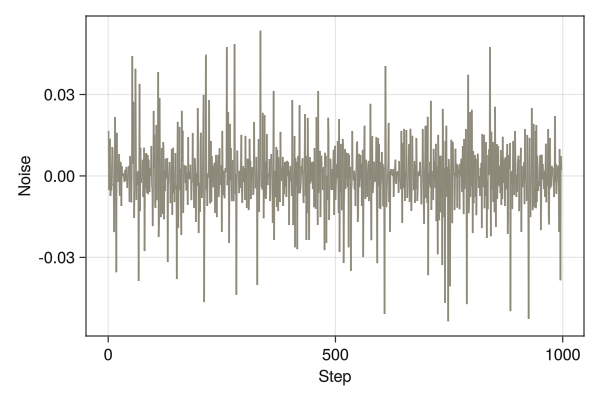

In [148]:
noise = dataset_norm[3:end-2, :] .- ues 
# plot noise[:, 1]
figure = Figure(resolution = (600, 400))
ax = figure[1, 1] = Axis(figure; xlabel = "Step", ylabel = "Noise")
lines!(ax, noise[:, 1], color = :cornsilk4)
figure

In [146]:
basis = [
    BasisTerm(u -> u[:, 1]),
    BasisTerm(u -> u[:, 2]),
    BasisTerm(u -> u[:, 1] .* u[:, 2]),
    BasisTerm(u -> u[:, 1] .^ 2),
    BasisTerm(u -> u[:, 2] .^ 2)
]
print("Expected coefficients:")
expected_i = [1 0; 0 1; 1 1; 0 0; 0 0]

Expected coefficients:

5×2 Matrix{Int64}:
 1  0
 0  1
 1  1
 0  0
 0  0

In [161]:
#basic SINDy
iter = 10
prob = SINDy_Problem(ues, dues, dt, basis, iter; STRRidge = false)
prob.η = 1e-3
batches = 100; pct_size = 0.6; tol = 0.95; parallel = true
m, l = ensemble_solve_SINDy(prob,batches, pct_size, tol, parallel)
display(m)
display(l)

5×2 Matrix{Float64}:
 -0.218847   0.0
  0.0        0.0
  0.331821  -0.145974
  0.0        0.0
  0.0        0.0

5×2 Matrix{Float64}:
 1.0   0.0
 0.0   0.52
 1.0   1.0
 0.62  0.0
 0.04  0.0

In [162]:
# parameters
iter = 10
cs = exp10.(-10:0.1:-9)
cs = [0]
tspan = (0, 1000-5)
batches = 100; pct_size = 0.6; tol = 0.95; parallel = true

alg = PFA([], tspan, cs, 1, nothing, 0.8)
prob = SINDy_Problem(ues, dues, dt, basis, iter, alg; STRRidge = true)
m, l = ensemble_solve_SINDy(prob,batches, pct_size, tol, parallel)
display(m)
display(l)

5×2 Matrix{Float64}:
 0.0        0.0
 0.0        0.0
 0.113007  -0.0693069
 0.0        0.0
 0.0        0.0

5×2 Matrix{Float64}:
 0.54  0.0
 0.0   0.13
 1.0   1.0
 0.03  0.0
 0.0   0.0

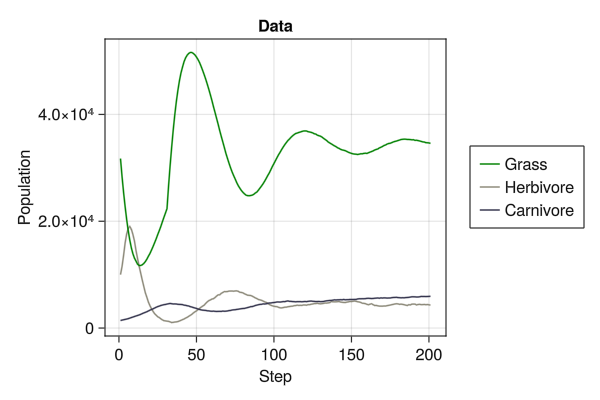

GLMakie.Screen(...)

In [131]:
dataset = PredatorPrey.simulate_system(10000, 200)
# skip the first 200 data points
#dataset = dataset[201:end, :]
plot_population(dataset)

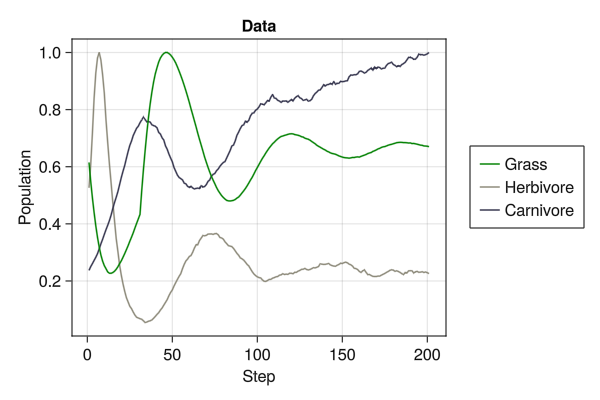

GLMakie.Screen(...)

In [132]:
dataset_norm = float.(dataset[:, 1])./maximum(dataset[:, 1])
dataset_norm = hcat(dataset_norm, float.(dataset[:, 2])./maximum(dataset[:, 2]))
dataset_norm = hcat(dataset_norm, float.(dataset[:, 3])./maximum(dataset[:, 3]))
plot_population(dataset_norm)

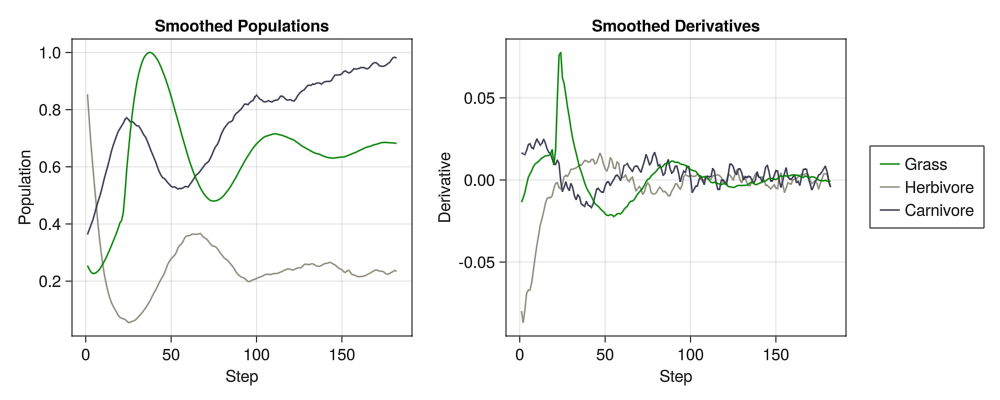

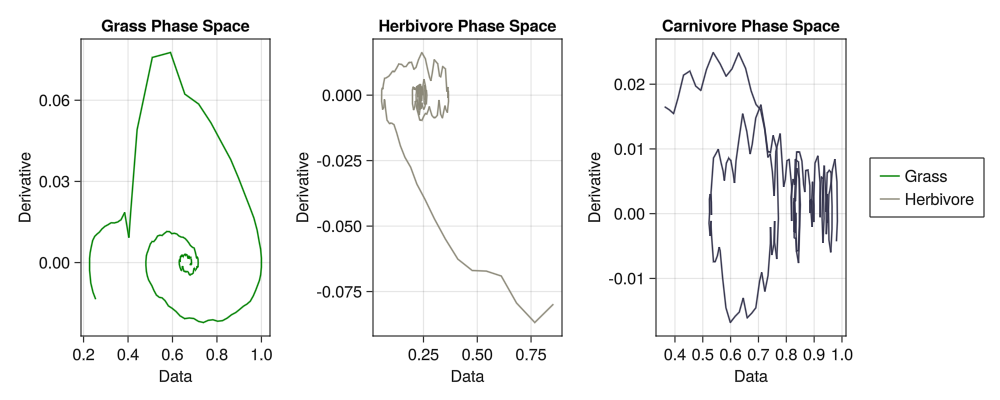

0

GLMakie.Screen(...)

In [133]:
ues, dues, retcode = stable_smooth(dataset_norm, 1)
print(retcode)
ues, dues = SG_smoothing_optim(dataset_norm, 1; loss_function = 2, disp_loss_landscape = false)
# skip first and last five percent of data
ues = ues[round(Int, 0.05 * size(ues, 1)):round(Int, 0.95 * size(ues, 1)), :]
dues = dues[round(Int, 0.05 * size(dues, 1)):round(Int, 0.95 * size(dues, 1)), :]
plot_smoothed_data_system(ues, dues)

In [134]:
basis = [
    BasisTerm(u -> u[:, 1]),
    BasisTerm(u -> u[:, 2]),
    BasisTerm(u -> u[:, 3]),
    BasisTerm(u -> u[:, 1] .* u[:, 2]),
    BasisTerm(u -> u[:, 3] .* u[:, 2]),
    BasisTerm(u -> u[:, 1] .* u[:, 3]),
    BasisTerm(u -> u[:, 1] .^ 2),
    BasisTerm(u -> u[:, 2] .^ 2),
    BasisTerm(u -> u[:, 3] .^ 2),
    BasisTerm(u -> u[:, 1] .* u[:, 2] .* u[:, 3]),
]
print("Expected coefficients:")
expected_i = [1 0 0; 0 1 0; 0 0 1; 1 1 0; 0 1 1; 0 0 0; 0 0 0; 0 0 0; 0 0 0; 0 0 0]
basis = [
    BasisTerm(u -> u[:, 1]),
    BasisTerm(u -> u[:, 2]),
    BasisTerm(u -> u[:, 3]),
    BasisTerm(u -> u[:, 1] .* u[:, 2]),
    BasisTerm(u -> u[:, 3] .* u[:, 2])
]
print("Expected coefficients:")
expected_i = [1 0 0; 0 1 0; 0 0 1; 1 1 0; 0 1 1]

Expected coefficients:Expected coefficients:

5×3 Matrix{Int64}:
 1  0  0
 0  1  0
 0  0  1
 1  1  0
 0  1  1

In [135]:
#basic SINDy
iter = 10
prob = SINDy_Problem(ues, dues, dt, basis, iter; STRRidge = false)
batches = 100; pct_size = 0.8; tol = 0.95; parallel = true
m, l = ensemble_solve_SINDy(prob,batches, pct_size, tol, parallel)
display(m)
display(l)

5×3 Matrix{Float64}:
  0.0         0.0       0.0
  0.0        -0.175864  0.0
  0.0         0.0       0.0
 -0.14072     0.270948  0.0
  0.0928818   0.0       0.0

5×3 Matrix{Float64}:
 0.0   0.0  0.0
 0.36  1.0  0.07
 0.08  0.0  0.0
 1.0   1.0  0.89
 0.98  0.0  0.3

In [140]:
# parameters
iter = 10
cs = exp10.(-10:0.1:2)
tspan = (0, 1000-5)
batches = 100; pct_size = 0.9; tol = 0.95; parallel = true

alg = PFA([], tspan, cs, 1, nothing, 0.8)
prob = SINDy_Problem(ues, dues, dt, basis, iter, alg; STRRidge = true)
m, l = ensemble_solve_SINDy(prob,batches, pct_size, tol, parallel)
display(m)
display(l)


5×3 Matrix{Float64}:
  0.0         0.0       0.0
  0.0        -0.110829  0.0
  0.0411962   0.0       0.0
 -0.117683    0.154246  0.0
 -0.0589825   0.0       0.0

5×3 Matrix{Float64}:
 0.0  0.0  0.69
 0.0  1.0  0.82
 1.0  0.0  0.5
 1.0  1.0  0.0
 1.0  0.0  0.0

## Trying 3 species again

In [5]:
function stable_smooth(dataset, dt)
    ues, dues = DCT_smooth(dataset, dt)
    retcode = 0
    datasize = size(ues, 1)
    # check if any of the states or derivatives are static
    if any(std(ues[Int(round(0.1*datasize)):Int(round(0.9*datasize))], dims = 1) .< 1e-4) && any(mean(dues[Int(round(0.1*datasize)):Int(round(0.9*datasize))], dims = 1) .< 1e-4)
        ues, dues = SG_smoothing_optim(dataset, dt; loss_function = 2, disp_loss_landscape = false)
        retcode = 1
    end
    return ues, dues, retcode
end

stable_smooth (generic function with 1 method)

In [83]:
function create_dataset(pop, steps, init_density, plot = false)
    # create dataset
    u_dataset = []
    du_dataset = []
    for i in 1:size(init_density, 1)
        new_data = PredatorPrey.simulate_system(pop, steps, init_density[i, :]...)
        norm_data = normalize_data(new_data)
        norm_data = (new_data)
        #new_u, new_du, r = stable_smooth(norm_data, 1)
        #plot && println(r)
        new_u, new_du = SG_smoothing_optim(norm_data, 1; loss_function = 2, disp_loss_landscape = false)
        u_dataset = vcat(u_dataset, new_u)
        du_dataset = vcat(du_dataset, new_du)
        plot && plot_smoothed_data_system(new_u, new_du; second = false)
    end
    return Matrix{Float16}(u_dataset), Matrix{Float16}(du_dataset)
end

create_dataset (generic function with 2 methods)

In [7]:
densities = hcat(rand(0.01:0.01:0.2, 10), rand(0:0.01:0.2, 10))

10×2 Matrix{Float64}:
 0.18  0.0
 0.1   0.01
 0.06  0.06
 0.2   0.19
 0.11  0.2
 0.18  0.17
 0.06  0.09
 0.1   0.08
 0.02  0.02
 0.1   0.13

In [8]:
ues, dues = create_dataset(1000, 500, densities);

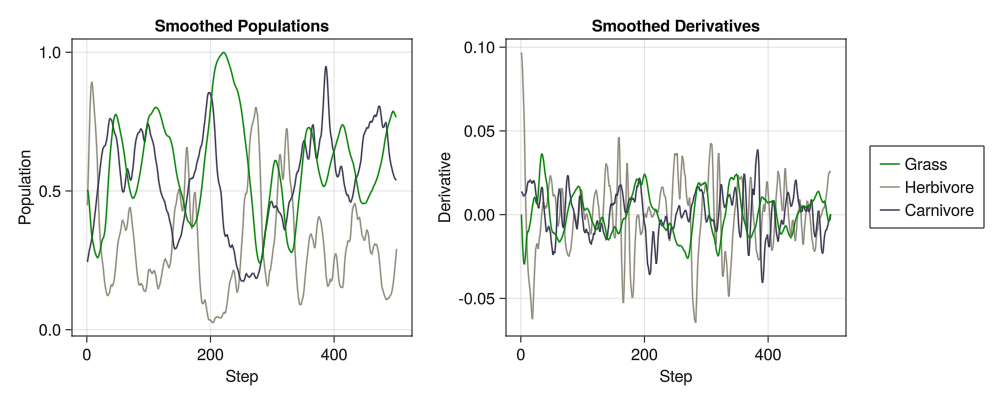

In [92]:
ues, dues = create_dataset(100, 500, [0.1 0.04], true);

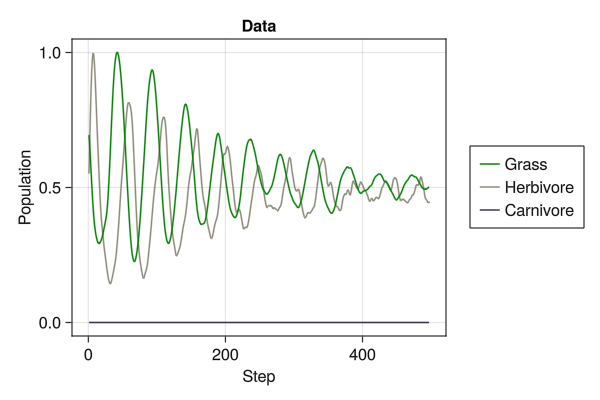

GLMakie.Screen(...)

In [10]:
plot_population(ues)

In [241]:
std(dues, dims = 1)

1×3 Matrix{Float16}:
 0.005108  0.0  0.008064

In [93]:
basis = [
    BasisTerm(u -> u[:, 1]),
    BasisTerm(u -> u[:, 2]),
    BasisTerm(u -> u[:, 3]),
    BasisTerm(u -> u[:, 1] .* u[:, 2]),
    BasisTerm(u -> u[:, 3] .* u[:, 2]),
    BasisTerm(u -> u[:, 1] .* u[:, 3]),
    BasisTerm(u -> u[:, 1] .^ 2),
    BasisTerm(u -> u[:, 2] .^ 2),
    BasisTerm(u -> u[:, 3] .^ 2),
    BasisTerm(u -> u[:, 1] .* u[:, 2] .* u[:, 3]),
]
basis2 = [
    BasisTerm(u -> u[:, 1]),
    BasisTerm(u -> u[:, 2]),
    BasisTerm(u -> u[:, 3]),
    BasisTerm(u -> u[:, 1] .* u[:, 2]),
    BasisTerm(u -> u[:, 3] .* u[:, 2])
]
dt = 1
print("Expected coefficients:")
expected_i = [1 0 0; 0 1 0; 0 0 1; 1 1 0; 0 1 1; 0 0 0; 0 0 0; 0 0 0; 0 0 0; 0 0 0]
#expected_i = [1 0 0; 0 1 0; 0 0 1; 1 1 0; 0 1 1]

Expected coefficients:

10×3 Matrix{Int64}:
 1  0  0
 0  1  0
 0  0  1
 1  1  0
 0  1  1
 0  0  0
 0  0  0
 0  0  0
 0  0  0
 0  0  0

In [94]:
#basic SINDy
iter = 10
control = Matrix{Bool}([1 0 0; 0 1 0; 0 0 1; 1 1 1; 1 1 1; 1 1 1; 1 1 1; 1 1 1; 1 1 1; 1 1 1])
prob = SINDy_Problem(ues, dues, dt, basis, iter; STRRidge = false, control = control)
batches = 100; pct_size = 0.8; tol = 0.95; parallel = true
m, l = ensemble_solve_SINDy(prob,batches, pct_size, tol, parallel)
display(m)
display(l)

10×3 Matrix{Float64}:
 0.0   0.0       0.0
 0.0  -0.24559   0.0
 0.0   0.0       0.0
 0.0   0.376557  0.0
 0.0   0.0       0.0
 0.0   0.0       0.0
 0.0   0.0       0.0
 0.0   0.158405  0.0
 0.0   0.0       0.0
 0.0   0.0       0.0

10×3 Matrix{Float64}:
 0.74  0.0   0.0
 0.0   1.0   0.0
 0.0   0.0   0.42
 0.8   1.0   0.0
 0.05  0.2   0.51
 0.04  0.1   0.59
 0.74  0.06  0.0
 0.04  1.0   0.0
 0.21  0.06  0.07
 0.24  0.6   0.43

In [95]:
# parameters
iter = 10
cs = exp10.(-10:0.1:2)
tspan = (0, 1000-5)
batches = 100; pct_size = 0.9; tol = 0.95; parallel = true

alg = PFA([], tspan, cs, 1, nothing, 0.8)
prob = SINDy_Problem(ues, dues, dt, basis, iter, alg; STRRidge = true, control = control)
m, l, bm = ensemble_solve_SINDy(prob,batches, pct_size, tol, parallel)
display(m)
display(bm)
display(l)


10×3 Matrix{Float64}:
  0.0873587   0.0        0.0
  0.0         0.0        0.0
  0.0         0.0        0.0
 -0.133553    0.156344   0.0
  0.0        -0.124107   0.0
  0.0         0.0       -0.0657129
 -0.0762852   0.0        0.0
  0.0         0.0        0.0
  0.0         0.0        0.0
  0.0         0.0        0.0

10×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

10×3 Matrix{Float64}:
 0.99  0.0   0.0
 0.0   0.59  0.0
 0.0   0.0   0.67
 1.0   1.0   0.0
 0.01  1.0   0.3
 0.0   0.06  0.97
 0.99  0.0   0.0
 0.0   0.28  0.0
 0.01  0.06  0.1
 0.0   0.47  0.0

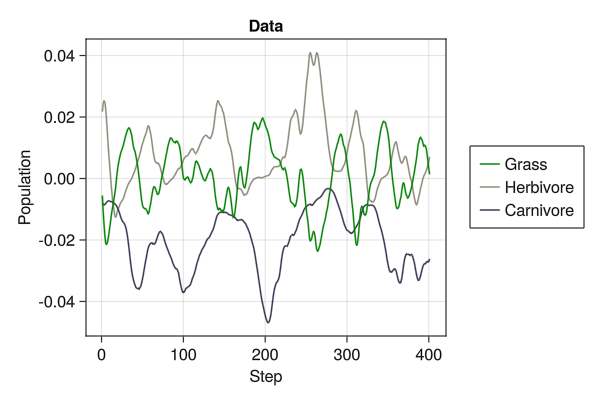

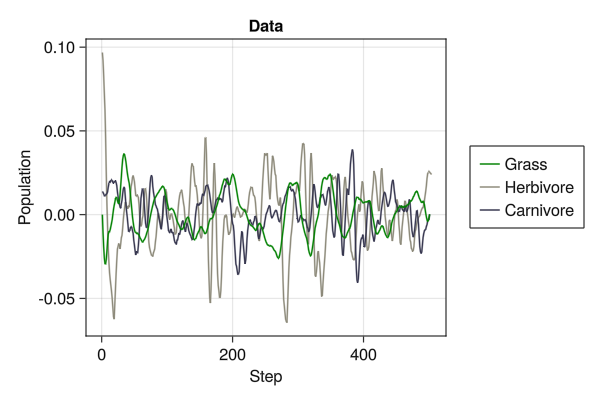

GLMakie.Screen(...)

In [103]:
des = Matrix{Float16}(prob.Θ * m)
plot_population(des)
plot_population(dues)

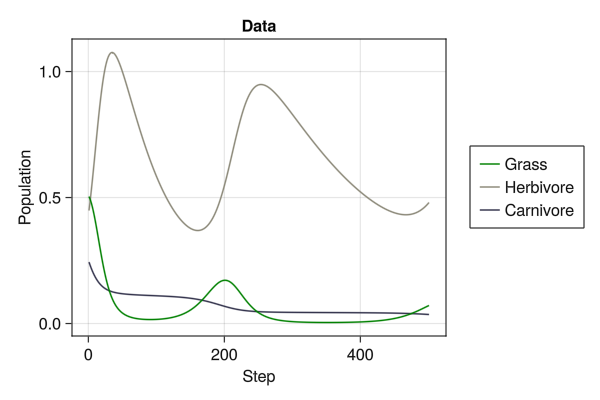

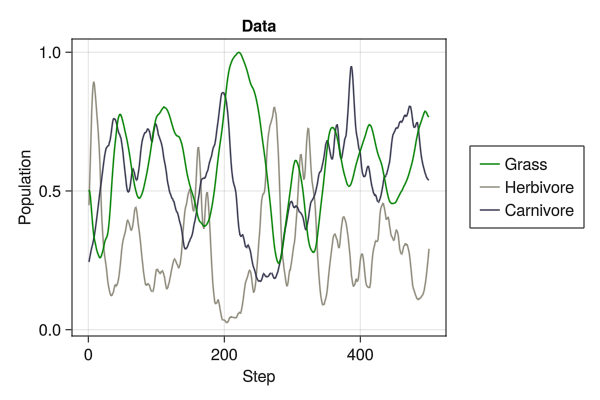

GLMakie.Screen(...)

In [96]:
es = get_trajectory(prob, m)
plot_population(es)
plot_population(ues)

In [311]:
prob = SINDy_Problem(ues, dues, dt, basis, iter, alg; STRRidge = true, control = control)

Modified_SINDy_Problem(Real[Float16(0.5103) Float16(0.81) Float16(0.4802); Float16(0.4875) Float16(0.883) Float16(0.503); … ; Float16(0.8657) Float16(0.5996) Float16(0.772); Float16(0.868) Float16(0.616) Float16(0.771)], Real[Float16(-0.01955) Float16(0.0761) Float16(0.0208); Float16(-0.02475) Float16(0.0681) Float16(0.02336); … ; Float16(0.002367) Float16(0.0173) Float16(-0.001843); Float16(0.00243) Float16(0.01575) Float16(-0.0006638)], 1, BasisTerm[BasisTerm(var"#185#190"(), false), BasisTerm(var"#186#191"(), false), BasisTerm(var"#187#192"(), false), BasisTerm(var"#188#193"(), false), BasisTerm(var"#189#194"(), false)], ModifiedSINDy.SINDy_Base.var"#Lib#5"{Vector{Function}}(Function[ModifiedSINDy.SINDy_Base.var"#new_theta#4"{Vector{BasisTerm}, Int64}(BasisTerm[BasisTerm(var"#185#190"(), false), BasisTerm(var"#186#191"(), false), BasisTerm(var"#187#192"(), false), BasisTerm(var"#188#193"(), false), BasisTerm(var"#189#194"(), false)], 1), ModifiedSINDy.SINDy_Base.var"#new_theta#4"{Ve

In [293]:
a = deepcopy(prob)
a.du = a.du[2:3, :]
a.Θ = a.Θ[2:3, :]

2×5 Matrix{Real}:
 0.4875  0.883  0.503   0.4304  0.444
 0.4622  0.941  0.5264  0.4348  0.4954

In [334]:
prob.du[1, :]

3-element Vector{Real}:
 Float16(-0.01955)
 Float16(0.0761)
 Float16(0.0208)

In [337]:
Vector{AbstractFloat}([])

AbstractFloat[]

In [324]:
size(prob.du, 2)

3

In [317]:
y = zeros(Real, size(a.active_Ξ))
y[prob.control_Ξ[:,1], 1] .= 1
y

5×3 Matrix{Real}:
 1  0  0
 0  0  0
 0  0  0
 1  0  0
 1  0  0